In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [203]:
bronx = pd.read_csv('housing_data/bronx.csv')
brooklyn = pd.read_csv('housing_data/brooklyn.csv')
manhattan = pd.read_csv('housing_data/manhattan.csv')
queens = pd.read_csv('housing_data/queens.csv')
statenisland = pd.read_csv('housing_data/statenisland.csv')

In [204]:
df = pd.concat([manhattan, bronx, queens,brooklyn, statenisland], ignore_index=True)
df.dropna(how='all',axis=1,inplace=True)

In [251]:
# clean column name
new_columns = []
for each in df.columns:
    change = each.lower().strip().replace(' ', '_')
    new_columns.append(change)
df.columns = new_columns

# clean variables
df['sale_price'] = df['sale_price'].replace(',','').astype(float)
df.loc[df['residential_units']=='8,764','residential_units'] = 1
df['residential_units'] = df['residential_units'].astype('float')
#df.loc[df['residential_units']=='8,764','residential_units'] = 1

/Users/siyushen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83521 entries, 0 to 83520
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         78333 non-null  float64
 1   neighborhood                    78333 non-null  object 
 2   building_class_category         78333 non-null  object 
 3   tax_class_at_present            78314 non-null  object 
 4   block                           78333 non-null  float64
 5   lot                             78333 non-null  float64
 6   building_class_at_present       78314 non-null  object 
 7   address                         78333 non-null  object 
 8   apartment_number                17737 non-null  object 
 9   zip_code                        78324 non-null  float64
 10  residential_units               62445 non-null  float64
 11  commercial_units                62445 non-null  float64
 12  total_units                     

In [207]:
df.describe()

,borough,block,lot,zip_code,commercial_units,year_built,tax_class_at_time_of_sale,sale_price
count,78333.000000,78333.000000,78333.000000,78324.000000,62445.000000,72561.000000,78333.000000,7.833300e+04
mean,2.986072,4381.655675,364.344912,10854.869082,0.399103,1950.624440,1.619981,1.491649e+06
std,1.282365,3658.873793,657.787828,561.667498,7.524995,34.765651,0.791168,1.371906e+07
min,1.000000,1.000000,1.000000,10001.000000,-16.000000,1800.000000,1.000000,0.000000e+00
25%,2.000000,1346.000000,22.000000,10306.000000,0.000000,1925.000000,1.000000,0.000000e+00
50%,3.000000,3514.000000,50.000000,11209.000000,0.000000,1945.000000,1.000000,4.780000e+05
75%,4.000000,6507.000000,400.000000,11357.000000,0.000000,1970.000000,2.000000,8.900000e+05
max,5.000000,16350.000000,9116.000000,11697.000000,842.000000,2019.000000,4.000000,2.155000e+09


### address

In [208]:
df['address'].isnull().value_counts()

False    78333
True      5188
Name: address, dtype: int64

In [233]:
df['address'].nunique()

75740

In [242]:
df['address'].dropna().value_counts().head(30)

N/A BEACH 28 STREET                   13
75 GREENE AVENUE, STORA               12
N/A EUGENE SREET                      11
21-30 44TH DRIVE, PKG 1                9
N/A MAPLE COURT                        8
551 MAIN STREET, RES                   8
N/A SEAVER AVENUE                      8
55 AUSTIN PLACE                        8
N/A HYLAN BOULEVARD                    7
N/A HOME PLACE                         7
N/A GUINZBURG ROAD                     7
118-15 204TH STREET                    6
34-25 109TH STREET                     6
N/A MEEKER AVENUE                      6
1335 AVENUE OF THE AMERICAS, TIMES     6
33 WEST 37TH STREET, FLOOR             6
N/A 150TH STREET                       6
322 CLIFTON PLACE                      6
N/A NORTON AVENUE                      5
N/A SOUTH ROAD                         5
215 EAST 96TH STREET, CONDP            5
523 MACON STREET                       5
N/A BEACH 43 STREET                    5
1305 EAST NEW YORK AVENUE              5
N/A VETERANS ROA

In [236]:
df[df['address'] == 'N/A BEACH 28 STREET']['borough'] #Queens

31617    4.0
31618    4.0
31619    4.0
31620    4.0
31621    4.0
31622    4.0
31623    4.0
31624    4.0
31625    4.0
31626    4.0
31628    4.0
31629    4.0
31630    4.0
Name: borough, dtype: float64

In [241]:
df[df['address'] == '75 GREENE AVENUE, STORA']['borough'] #Brooklyn

<bound method Series.unique of 65224    3.0
65225    3.0
65226    3.0
65227    3.0
65228    3.0
65229    3.0
65230    3.0
65231    3.0
65232    3.0
65233    3.0
65234    3.0
65235    3.0
Name: borough, dtype: float64>

In [240]:
df[df['address'] == 'N/A EUGENE SREET']['borough'] #Statenisland

80418    5.0
80419    5.0
80420    5.0
80421    5.0
80422    5.0
80423    5.0
80424    5.0
80425    5.0
80426    5.0
80427    5.0
80428    5.0
Name: borough, dtype: float64

### apartment number

In [211]:
df['apartment_number'].isnull().value_counts()

True     65784
False    17737
Name: apartment_number, dtype: int64

In [212]:
df['apartment_number'].dropna().nunique()

3879

In [213]:
df['apartment_number'].dropna().value_counts().head(30)

3B    285
3A    278
4     268
2     265
2B    262
2A    259
1     246
4B    233
4A    232
3     226
1A    211
1B    178
5B    165
3C    157
5A    156
2C    147
6B    141
4C    141
6A    136
6     126
4D    115
2D    111
5C    110
3D    107
7A     93
3E     92
3F     92
5      92
5D     91
6D     89
Name: apartment_number, dtype: int64

### zip code

In [214]:
df['zip_code'].isnull().value_counts()

False    78324
True      5197
Name: zip_code, dtype: int64

In [215]:
df['zip_code'].dropna().nunique()

192

In [216]:
df['zip_code'].dropna().value_counts().head(30)

10314.0    1294
10023.0    1248
11234.0    1113
10312.0    1070
10306.0    1065
11375.0    1062
11235.0    1055
10473.0     932
10011.0     912
11229.0     892
10016.0     863
11236.0     856
11215.0     854
11201.0     842
10019.0     839
10003.0     838
11355.0     836
10022.0     832
11208.0     763
11434.0     747
11207.0     747
10469.0     740
11221.0     738
11354.0     734
10309.0     719
11238.0     719
11357.0     716
11230.0     716
10025.0     714
11203.0     711
Name: zip_code, dtype: int64

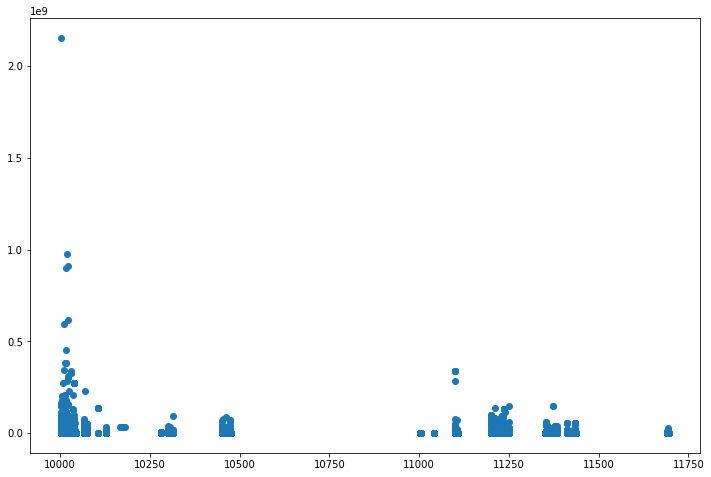

In [246]:
fig = plt.figure(figsize=(12,8))
plt.scatter(x=df['zip_code'],y=df['sale_price'])

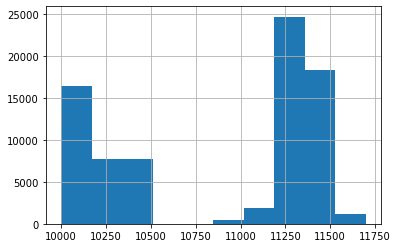

In [245]:
df['zip_code'].hist()

### residential units

In [258]:
df['residential_units'].dropna().nunique()

152

In [256]:
df['residential_units'].dropna().value_counts()

1.0      33155
2.0      15383
0.0       6048
3.0       4384
4.0       1126
         ...  
101.0        1
312.0        1
179.0        1
115.0        1
90.0         1
Name: residential_units, Length: 152, dtype: int64

In [259]:
df['residential_units'].max()

826.0

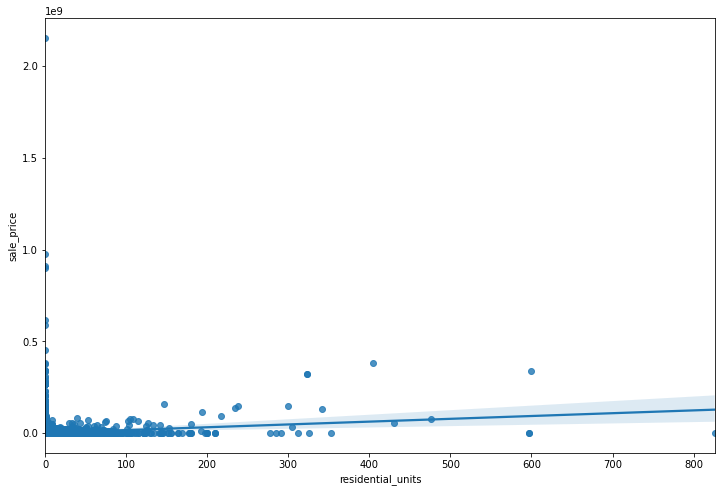

In [255]:
fig = plt.figure(figsize=(12,8))
sns.regplot(x='residential_units', y='sale_price',data=df)